# Generate Baseline Prediction

For this case we will generate two different examples of Baseline Prediction

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Set Datasets

In [0]:
!mkdir data

In [0]:
!mkdir data/AirQualityUCI

In [0]:
train = pd.read_csv('data/AirQualityUCI/train_no_outliers.csv')
test = pd.read_csv('data/AirQualityUCI/test.csv')
X_train = train.loc[:, train.columns != 'NO2(GT)']
X_test = test.loc[:, ~test.columns.isin(['NO2(GT)','Year'])]
y_train = train['NO2(GT)']
y_test = test['NO2(GT)']

# Deep Learning - Keras

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


# Define and fit the final model

In [0]:
model = Sequential()
model.add(Dense(4, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

In [14]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
5118/5118 [==============================] - 1s 163us/step - loss: 1943.0512
Epoch 2/1000
5118/5118 [==============================] - 1s 122us/step - loss: 1897.0840
Epoch 3/1000
5118/5118 [==============================] - 1s 123us/step - loss: 1857.0311
Epoch 4/1000
5118/5118 [==============================] - 1s 123us/step - loss: 1813.0299
Epoch 5/1000
5118/5118 [==============================] - 1s 122us/step - loss: 1772.2208
Epoch 6/1000
5118/5118 [==============================] - 1s 121us/step - loss: 1733.9322
Epoch 7/1000
5118/5118 [==============================] - 1s 121us/step - loss: 1705.3555
Epoch 8/1000
5118/5118 [==============================] - 1s 122us/step - loss: 1674.1572
Epoch 9/1000
5118/5118 [==============================] - 1s 121us/step - loss: 1653.7696
Epoch 10/1000
5118/5118 [==============================] - 1s 117us/step - loss: 1633.8622
Epoch 11/1000
5118/5118 [==============================] - 1s 121us/step - loss: 1618.8348
Epoch 12

In [0]:
predictions = model.predict(X_test).flatten()

<function ndarray.all>

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


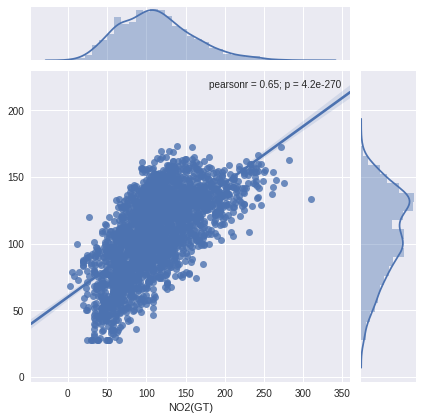

In [22]:
sns.jointplot(x=y_test,y=predictions,kind='reg')

## Evaluation Metrics

* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [0]:
from sklearn import metrics

In [24]:
metrics.mean_absolute_error(y_test,predictions)

27.91629084952831

In [25]:
metrics.mean_squared_error(y_test,predictions)

1260.8432362167748

In [27]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

35.50835445661732